# Diversity of strains

To visualize the diversity within strains compared to between strains, we overlay the PCA plot of the samples in each compendium.

Then to quantify the difference we compare the difference in centroid between the PAO1 and PA14 compendium with the spread across the samples within the compendium.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import pandas as pd
import plotnine as pn
import seaborn as sns
import numpy as np
from scipy.spatial.distance import pdist
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scripts import paths

/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# Compendia BEFORE processing (normalized filtered counts with all samples mapped)
pao1_all_expression_filename = paths.PAO1_GE
pa14_all_expression_filename = paths.PA14_GE

# Compendia AFTER processing (normalized filtered counts with samples split into strain type)
pao1_strain_expression_filename = paths.PAO1_COMPENDIUM
pa14_strain_expression_filename = paths.PA14_COMPENDIUM

# File containing table to map sample id to strain name
# sample_to_strain_filename = paths.SAMPLE_TO_STRAIN

In [3]:
# Load expression data
pao1_all_expression = pd.read_csv(
    pao1_all_expression_filename, index_col=0, header=0, sep="\t"
)
pa14_all_expression = pd.read_csv(
    pa14_all_expression_filename, index_col=0, header=0, sep="\t"
)

pao1_strain_expression = pd.read_csv(
    pao1_strain_expression_filename, index_col=0, header=0, sep="\t"
)
pa14_strain_expression = pd.read_csv(
    pa14_strain_expression_filename, index_col=0, header=0, sep="\t"
)

In [4]:
# Confirm that BEFORE compendia have 2,333 samples
print(pao1_all_expression.shape)
pao1_all_expression.head()

(2333, 5563)


,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA1905,PA0195,PA4812,PA0195.1,PA0457.1,PA1552.1,PA1555.1,PA3701,PA4724.1,PA5471.1
ERX541571,5621.037929,902.172829,1380.825635,1811.863764,140.337996,508.725234,483.664878,666.605479,681.641693,77.687105,...,0.0,97.735390,471.134699,12.530178,87.711247,75.181069,77.687105,2288.010535,250.603564,0.000000
ERX541572,6323.898054,835.453446,1754.599065,1814.798699,190.876886,418.460865,321.554138,493.343336,666.600816,45.516796,...,0.0,80.755606,487.470201,10.277986,70.477619,46.985080,60.199633,2218.576726,199.686588,0.000000
ERX541573,4954.119979,893.818410,1984.802645,1752.146970,350.955170,362.785119,373.300630,465.311348,616.471815,42.062043,...,0.0,114.356179,782.091108,19.716583,153.789344,43.376482,106.469546,1474.800376,101.211790,0.000000
ERX541574,4603.356163,773.573295,2227.891090,1911.321096,311.809544,323.710671,435.581271,435.581271,506.988037,78.547442,...,0.0,152.334434,561.733224,21.422030,85.688119,38.083608,64.266089,2116.020491,78.547442,2.380226
ERX541575,4260.451254,875.408119,2140.106080,1788.361959,320.126671,288.509222,276.652679,577.018444,739.057871,57.306626,...,0.0,136.350249,677.799063,15.808725,195.632966,21.736996,118.565434,1650.035620,61.258807,0.000000


In [5]:
print(pa14_all_expression.shape)
pa14_all_expression.head()

(2333, 5891)


,PA14_55610,PA14_55600,PA14_55590,PA14_55580,PA14_55570,PA14_55560,PA14_55550,PA14_55540,PA14_55530,PA14_55520,...,PA14_19205,PA14_17675,PA14_67975,PA14_36345,PA14_43405,PA14_38825,PA14_24245,PA14_28895,PA14_55117,PA14_59845
ERX541571,209.353167,55.650842,0.000000,2.650040,10.600160,10.600160,18.550281,71.551082,66.251002,5.300080,...,42.400641,140.452125,3487.452760,180.202726,21.200321,2.650040,1014.965355,386.905853,151.052285,0.0
ERX541572,223.627085,52.077540,6.126769,15.316924,21.443693,9.190154,12.253539,79.648003,82.711388,3.063385,...,61.267694,180.739699,2977.609951,223.627085,27.570463,15.316924,1203.910196,572.852943,119.472004,0.0
ERX541573,167.343061,44.624816,18.128832,23.706934,8.367153,18.128832,5.578102,64.148173,57.175546,8.367153,...,55.781020,207.784301,1811.488635,68.331750,4.183577,12.550730,1540.950687,616.380275,62.753648,0.0
ERX541574,203.038931,13.454387,6.115630,14.677513,4.892504,17.123765,8.561883,47.701918,58.710052,7.338757,...,67.271935,226.278327,2239.543876,77.056944,6.115630,12.231261,1700.145269,895.328300,165.122023,0.0
ERX541575,193.971582,46.384509,8.433547,29.517415,8.433547,12.650321,4.216774,44.276122,42.167735,6.325160,...,40.059348,250.898025,1574.964910,65.359990,4.216774,10.541934,1313.524952,710.526338,145.478686,0.0


## Get labels for which samples are in PAO1 and PA14 compendia

In [6]:
# Confirm that PAO1 has 890 samples and PA14 has 505 samples
print(pao1_strain_expression.shape)
print(pa14_strain_expression.shape)

(890, 5563)
(505, 5891)


In [7]:
# Add labels for samples that belong to compendium
pao1_strain_expression["compendium"] = "PAO1"
pao1_strain_label = pao1_strain_expression["compendium"].to_frame()

print(pao1_strain_label.shape)
pao1_strain_label.head()

(890, 1)


,compendium
ERX541571,PAO1
ERX541572,PAO1
ERX541573,PAO1
ERX541574,PAO1
ERX541575,PAO1


In [8]:
pa14_strain_expression["compendium"] = "PA14"
pa14_strain_label = pa14_strain_expression["compendium"].to_frame()

print(pa14_strain_label.shape)
pa14_strain_label.head()

(505, 1)


,compendium
ERX1477379,PA14
ERX2174773,PA14
ERX2174774,PA14
ERX2174775,PA14
ERX2174776,PA14


In [9]:
# Merge label dfs
strain_labels = pd.concat([pao1_strain_label, pa14_strain_label])

assert strain_labels.shape[0] == pao1_strain_label.shape[0] + pa14_strain_label.shape[0]
print(strain_labels.shape)
strain_labels.head()

(1395, 1)


,compendium
ERX541571,PAO1
ERX541572,PAO1
ERX541573,PAO1
ERX541574,PAO1
ERX541575,PAO1


### Format expression compendia

Train PCA on PAO1 compendium and apply to PA14 compendium

### Low dimensional embedding

In [10]:
# Try 0-1 scaling for PCA
# scaler = MinMaxScaler()
scaler = StandardScaler()

# Fitting
normalized_pao1_expression = scaler.fit_transform(pao1_all_expression)
normalized_pa14_expression = scaler.fit_transform(pa14_all_expression)

normalized_pao1_expression_df = pd.DataFrame(
    normalized_pao1_expression,
    columns=pao1_all_expression.columns,
    index=pao1_all_expression.index,
)

normalized_pa14_expression_df = pd.DataFrame(
    normalized_pa14_expression,
    columns=pa14_all_expression.columns,
    index=pa14_all_expression.index,
)

In [11]:
pca = PCA(n_components=2)
model_pca_pao1 = pca.fit(normalized_pao1_expression_df)

pao1_pca_encoded = model_pca_pao1.transform(normalized_pao1_expression_df)

In [12]:
pca = PCA(n_components=2)
model_pca_pa14 = pca.fit(normalized_pa14_expression_df)

pa14_pca_encoded = model_pca_pa14.transform(normalized_pa14_expression_df)

In [13]:
# Format
pao1_pca_encoded_df = pd.DataFrame(
    data=pao1_pca_encoded,
    index=pao1_all_expression.index,
    columns=["1", "2"],
)

In [14]:
# Format
pa14_pca_encoded_df = pd.DataFrame(
    data=pa14_pca_encoded,
    index=pa14_all_expression.index,
    columns=["1", "2"],
)

In [15]:
# Add strain labels
pao1_pca_encoded_label = pao1_pca_encoded_df.merge(
    strain_labels, left_index=True, right_index=True
)

In [16]:
print(pao1_pca_encoded_label.shape)
pao1_pca_encoded_label.head()

(1395, 3)


,1,2,compendium
ERX541571,3.812220,-49.728697,PAO1
ERX541572,2.644035,-45.457811,PAO1
ERX541573,3.096392,-31.254073,PAO1
ERX541574,6.175031,-34.033146,PAO1
ERX541575,1.171969,-31.885600,PAO1


In [17]:
pa14_pca_encoded_label = pa14_pca_encoded_df.merge(
    strain_labels, left_index=True, right_index=True
)

### Plot

In [18]:
# Colors
edge_colors = {
    # "Clinical Isolate": "#89A45E",
    "PA14": "#895881",
    # "PAK": "#EF8B46",
    "PAO1": "#C6A9B5",
    # "NA": "#D8DAEB",
    # "Other": "#808080"
}

/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


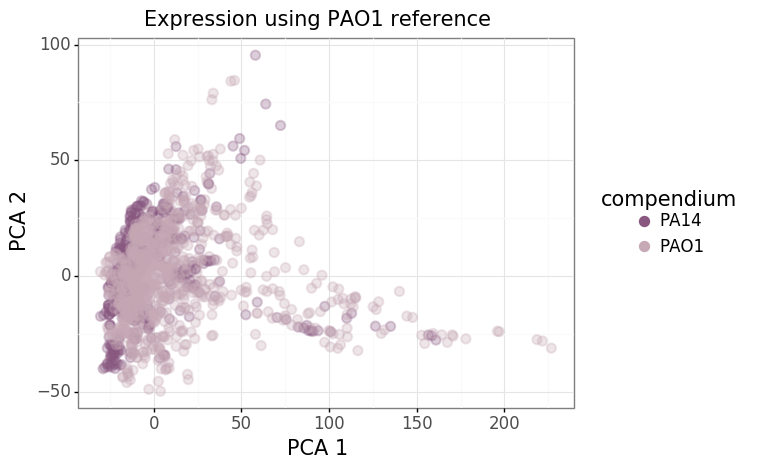

<ggplot: (8740349532005)>


/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: pa_pao1_ref_pca.svg
  warn('Filename: {}'.format(filename))
/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [19]:
# Plot gene expression in PAO1 reference
fig1 = pn.ggplot(pao1_pca_encoded_label, pn.aes(x="1", y="2"))
fig1 += pn.geom_point(pn.aes(color="compendium"), alpha=0.3, size=3, stroke=0.8)
fig1 += pn.scale_color_manual(values=edge_colors)
fig1 += pn.labs(
    x="PCA 1",
    y="PCA 2",
    title="Expression using PAO1 reference",
)
fig1 += pn.theme_bw()
fig1 += pn.theme(
    legend_title_align="center",
    plot_background=pn.element_rect(fill="white"),
    legend_key=pn.element_rect(fill="white", colour="white"),
    legend_title=pn.element_text(family="sans-serif", size=15),
    legend_text=pn.element_text(family="sans-serif", size=12),
    plot_title=pn.element_text(family="sans-serif", size=15),
    axis_text=pn.element_text(family="sans-serif", size=12),
    axis_title=pn.element_text(family="sans-serif", size=15),
)
fig1 += pn.guides(colour=pn.guide_legend(override_aes={"alpha": 1}))

print(fig1)

fig1.save("pa_pao1_ref_pca.svg", format="svg", dpi=300)

/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


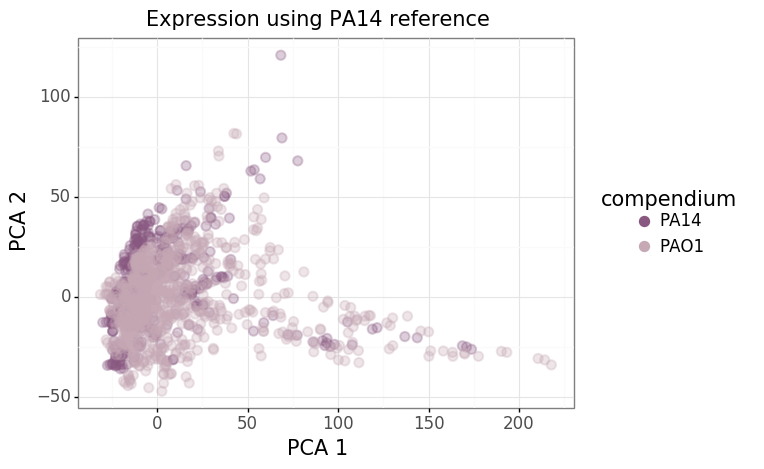

<ggplot: (8740348150753)>


/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units))
/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: pa_pa14_ref_pca.svg
  warn('Filename: {}'.format(filename))
/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [20]:
# Plot gene expression in PA14 reference
fig3 = pn.ggplot(pa14_pca_encoded_label, pn.aes(x="1", y="2"))
fig3 += pn.geom_point(pn.aes(color="compendium"), alpha=0.3, size=3, stroke=0.8)
fig3 += pn.scale_color_manual(values=edge_colors)
fig3 += pn.labs(
    x="PCA 1",
    y="PCA 2",
    title="Expression using PA14 reference",
)
fig3 += pn.theme_bw()
fig3 += pn.theme(
    legend_title_align="center",
    plot_background=pn.element_rect(fill="white"),
    legend_key=pn.element_rect(fill="white", colour="white"),
    legend_title=pn.element_text(family="sans-serif", size=15),
    legend_text=pn.element_text(family="sans-serif", size=12),
    plot_title=pn.element_text(family="sans-serif", size=15),
    axis_text=pn.element_text(family="sans-serif", size=12),
    axis_title=pn.element_text(family="sans-serif", size=15),
)
fig3 += pn.guides(colour=pn.guide_legend(override_aes={"alpha": 1}))
fig3 += pn.guides(fill=pn.guide_legend(override_aes={"alpha": 1}))

print(fig3)

fig3.save("pa_pa14_ref_pca.svg", format="svg", dpi=300)

## Calculate similarity between compendium

Text(0, 0.5, 'Explained variance ratio')

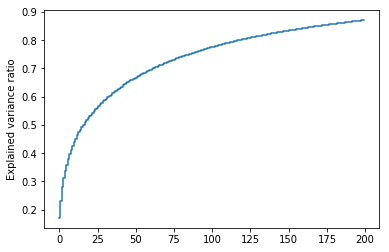

In [21]:
# What is the variance explained
pca_pao1 = PCA(n_components=200)
encoded_pca_pao1 = pca_pao1.fit_transform(normalized_pao1_expression_df)

exp_var_pca_pao1 = pca_pao1.explained_variance_ratio_
cum_sum_eigenvalues_pao1 = np.cumsum(exp_var_pca_pao1)

plt.step(
    range(0, len(cum_sum_eigenvalues_pao1)),
    cum_sum_eigenvalues_pao1,
    where="mid",
    label="Cumulative explained variance",
)
plt.ylabel("Explained variance ratio")

Text(0, 0.5, 'Explained variance ratio')

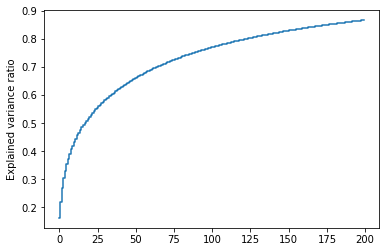

In [22]:
pca_pa14 = PCA(n_components=200)
encoded_pca_pa14 = pca_pa14.fit_transform(normalized_pa14_expression_df)

exp_var_pca_pa14 = pca_pa14.explained_variance_ratio_
cum_sum_eigenvalues_pa14 = np.cumsum(exp_var_pca_pa14)

plt.step(
    range(0, len(cum_sum_eigenvalues_pa14)),
    cum_sum_eigenvalues_pa14,
    where="mid",
    label="Cumulative explained variance",
)
plt.ylabel("Explained variance ratio")

Looks like 200 PCs explains 90% of the variance. So let's use these top 200 PCs to calculate the difference in centroid

In [23]:
# Get centroid
pao1_centroid = encoded_pca_pao1.mean(axis=0)
pa14_centroid = encoded_pca_pa14.mean(axis=0)

In [24]:
pao1_centroid = pao1_centroid.reshape(-1, 1)
pa14_centroid = pa14_centroid.reshape(-1, 1)

In [25]:
both_centroid = np.vstack((pao1_centroid.T, pa14_centroid.T))

In [26]:
# Calculate distance between centroids
mean_dist = pdist(both_centroid)

mean_dist

array([7.94310208e-15])

In [27]:
# Variance of PAO1 compendium
pca_pao1.explained_variance_.sum()

4845.648906424848

In [28]:
# Variance of PA14 compendium
pca_pa14.explained_variance_.sum()

5102.366719157444

In [29]:
encoded_pca_pa14.var(axis=0)

array([954.71292503, 333.19830558, 286.83074671, 209.56389418,
       154.76952316, 137.97815685, 113.62476381, 105.82160627,
        93.45270821,  81.67342425,  76.41781501,  69.69896463,
        68.10215572,  58.36418549,  55.16021182,  52.28069935,
        48.87842184,  46.78734444,  46.42008398,  42.79577   ,
        40.96032067,  39.74832144,  39.49556942,  37.95986552,
        36.24409462,  34.43285145,  32.897929  ,  32.37681675,
        31.89626473,  30.497597  ,  28.94730412,  28.73158248,
        28.03533592,  27.13902677,  26.84111308,  25.83207675,
        25.5191016 ,  25.23251827,  24.47973461,  23.8454993 ,
        23.17378791,  22.92980452,  21.80302181,  21.35320736,
        21.0991133 ,  20.93785751,  20.61852752,  20.35882758,
        19.87963982,  19.74645282,  19.29674734,  18.73299404,
        18.21890938,  17.88638612,  17.52273632,  17.29363053,
        16.85789506,  16.78968216,  16.64676   ,  16.22132312,
        15.83877539,  15.42292929,  14.99451572,  14.83